In [2]:
import pandas as pd
import scipy as sp
import numpy as np

filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv'
df = pd.read_csv(filepath).iloc[:, [0,4,6]]
df.head()

,carat,depth,price
0,0.23,61.5,326
1,0.21,59.8,326
2,0.23,56.9,327
3,0.29,62.4,334
4,0.31,63.3,335


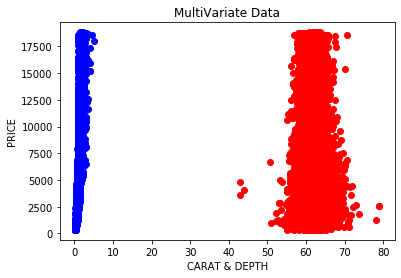

In [3]:
import matplotlib.pyplot as plt
plt.title("MultiVariate Data")
#for i in range(len(df)-1):
    #j=str(i)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

plt.plot(df[:]['carat'],df[:]['price'],'bo')
plt.plot(df[:]['depth'],df[:]['price'],'ro')
plt.xlabel("CARAT & DEPTH")
plt.ylabel("PRICE")
plt.show()

### Compute the Mahalanobis Distance between each row of x and the data  
 ####   x    : vector or matrix of data with, say, p columns.
 ####  data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
 #### cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.

In [19]:
def mahalanobis(x=None, data=None, cov=None):
   
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

df_x = df[['carat', 'depth', 'price']].head(500)
df_x['mahal'] = mahalanobis(x=df_x, data=df[['carat', 'depth', 'price']])
df_x.head()


AttributeError: module 'scipy' has no attribute 'linalg'

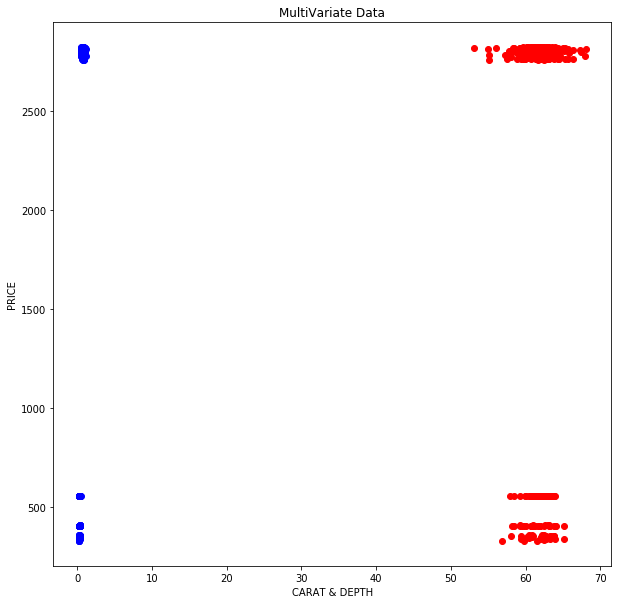

In [22]:
import matplotlib.pyplot as plt
plt.title("MultiVariate Data")
#for i in range(len(df)-1):
    #j=str(i)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

plt.plot(df_x[:]['carat'],df_x[:]['price'],'bo')
plt.plot(df_x[:]['depth'],df_x[:]['price'],'ro')
plt.xlabel("CARAT & DEPTH")
plt.ylabel("PRICE")
plt.show()

In [20]:
# Critical values for two degrees of freedom
from scipy.stats import chi2
chi2.ppf((1-0.01), df=2)
#> 9.21

9.21034037197618

In [21]:
# Compute the P-Values
df_x['p_value'] = 1 - chi2.cdf(df_x['mahal'], 2)

# Extreme values with a significance level of 0.01
df_x.loc[df_x.p_value < 0.01].head(100)

KeyError: 'mahal'